<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/SMA_BS_Sig2_18Oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


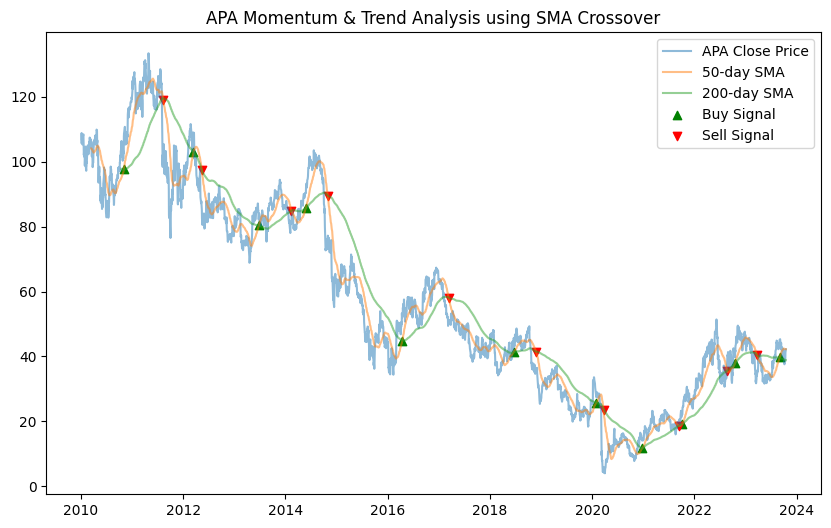

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2010-01-01", end="2023-10-17")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

    # Fetch data for SPY and QQQ
apa_data = fetch_data('APA')
jbht_data = fetch_data('JBHT')

# Generate signals for SPY and QQQ
apa_signals = sma_crossover(apa_data)
qqq_signals = sma_crossover(jbht_data)

# Plotting for SPY (similar can be done for QQQ)
plt.figure(figsize=(10,6))
plt.plot(apa_data, label='APA Close Price', alpha=0.5)
plt.plot(apa_signals['short_mavg'], label='50-day SMA', alpha=0.5)
plt.plot(apa_signals['long_mavg'], label='200-day SMA', alpha=0.5)
plt.scatter(apa_signals[apa_signals['positions'] == 1].index,
            apa_signals['short_mavg'][apa_signals['positions'] == 1],
            label='Buy Signal', marker='^', color='g', alpha=1)
plt.scatter(apa_signals[apa_signals['positions'] == -1].index,
            apa_signals['short_mavg'][apa_signals['positions'] == -1],
            label='Sell Signal', marker='v', color='r', alpha=1)
plt.title('APA Momentum & Trend Analysis using SMA Crossover')
plt.legend()
plt.show()

Note above that chart is indicating a Buy Signal for APA. This chart was done on Wed. 10/18/23, with data up to the 10/17 market close. Today, on 10/18/23, APA closed at 42.99 up 0.56 or up 1.32%. So doing chart after 10/17 close and following the Buy Signal, would have lead to a gain in the stock. So, are these charts accurate???

[*********************100%%**********************]  1 of 1 completed


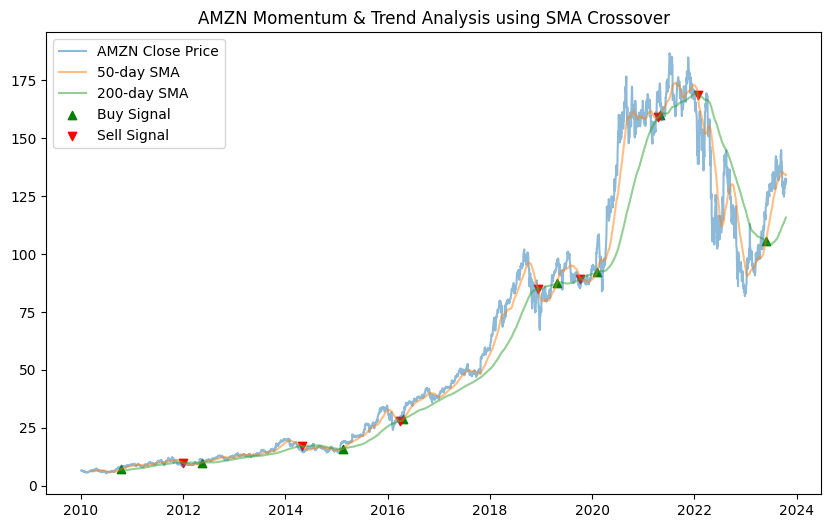

[*********************100%%**********************]  1 of 1 completed


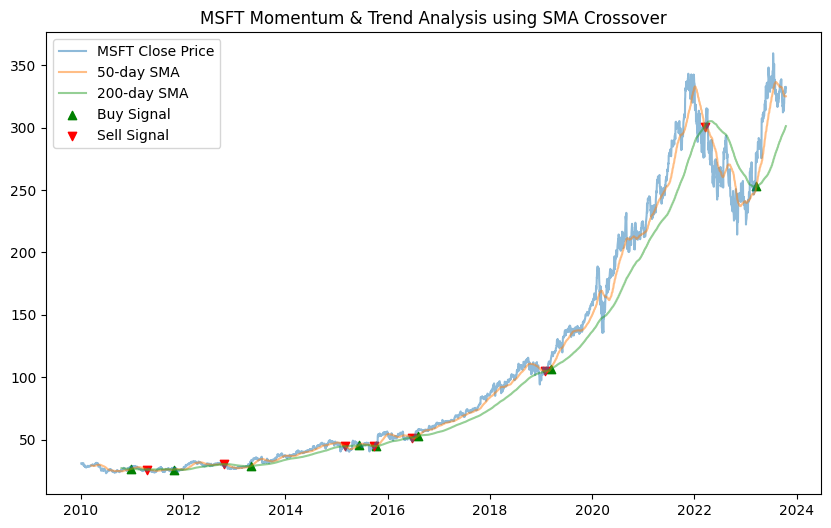

[*********************100%%**********************]  1 of 1 completed


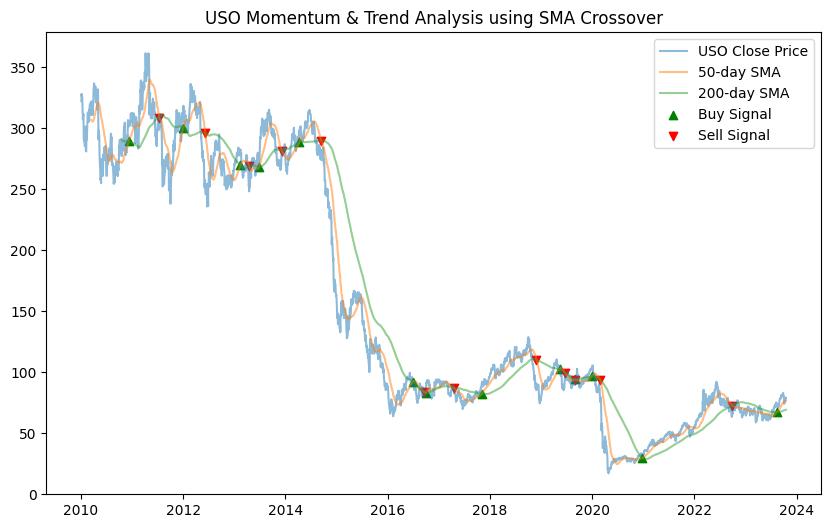

In [ ]:
def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2010-01-01", end="2023-10-18")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

tickers = ['AMZN', 'MSFT', 'USO']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

 # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1.0].index,
                signals['short_mavg'][signals['positions'] == 1.0],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1.0].index,
                signals['short_mavg'][signals['positions'] == -1.0],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()

Compare the below charts to charts on SMA_BS_SIG_18Oct23.ipynb. It is the same five stocks charted, but below the time frame is much shorter, but signals seem to be the same for 1/1/2010 to 10/17/2023 (SMA_BS_SIG_18Oct23.ipynb) as they are for time frame 1/1/2020 to 10/17/2023 as observed below

[*********************100%%**********************]  1 of 1 completed


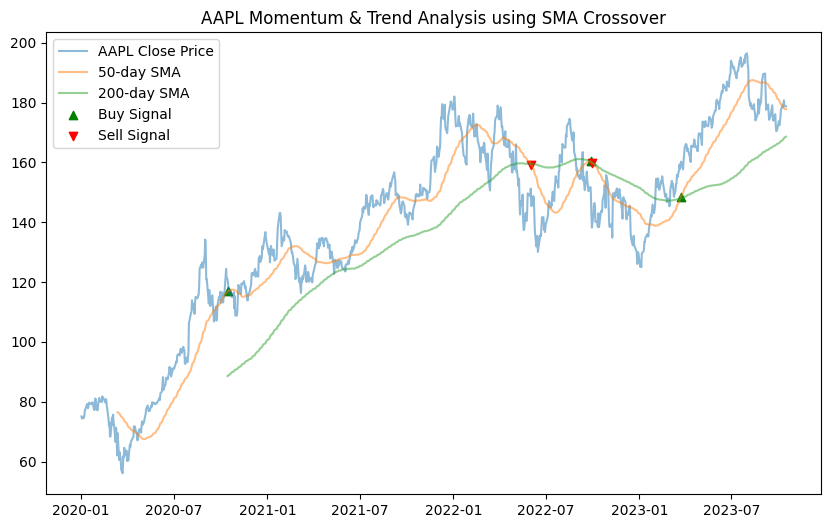

[*********************100%%**********************]  1 of 1 completed


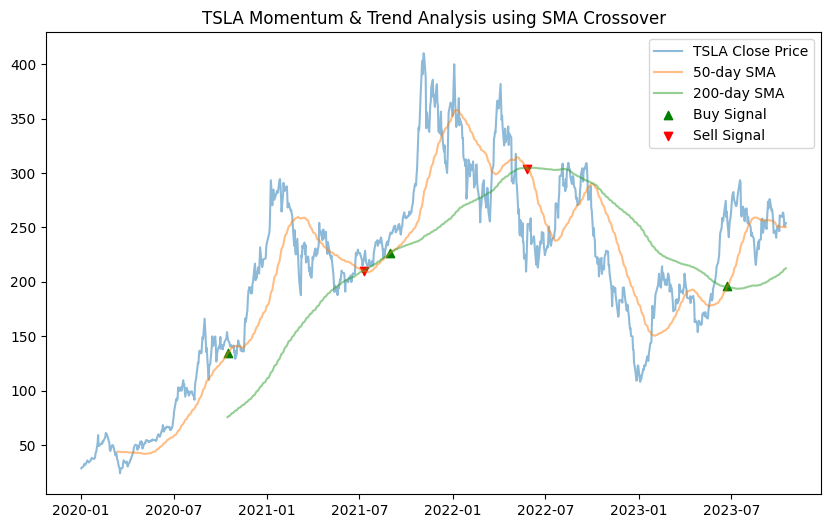

[*********************100%%**********************]  1 of 1 completed


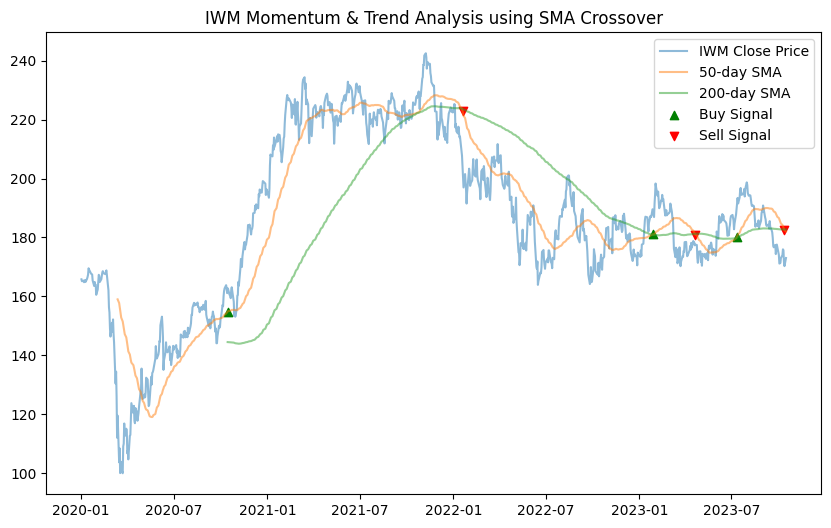

[*********************100%%**********************]  1 of 1 completed


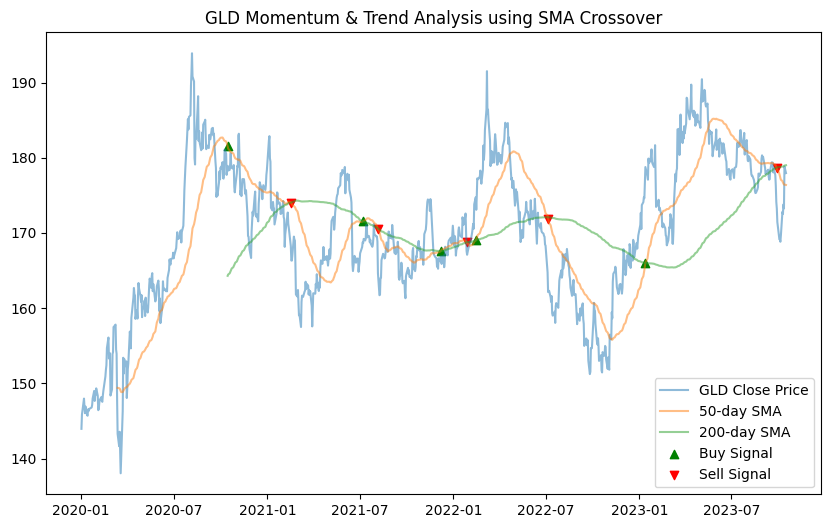

[*********************100%%**********************]  1 of 1 completed


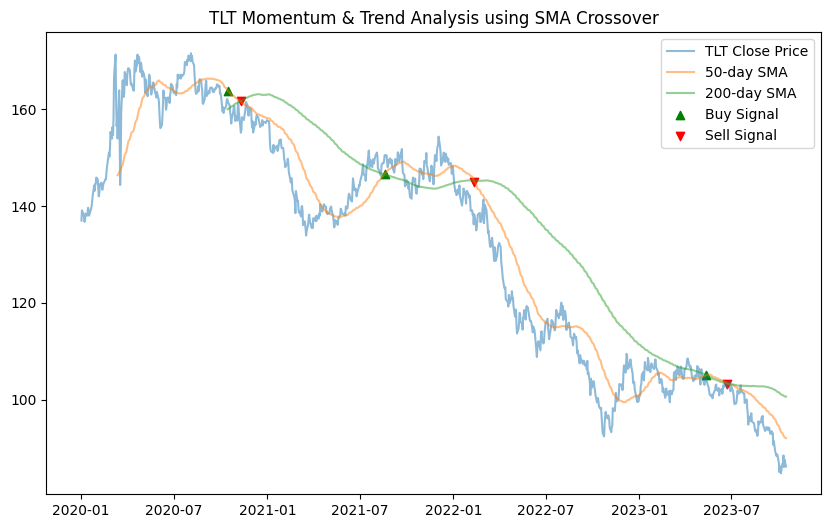

[*********************100%%**********************]  1 of 1 completed


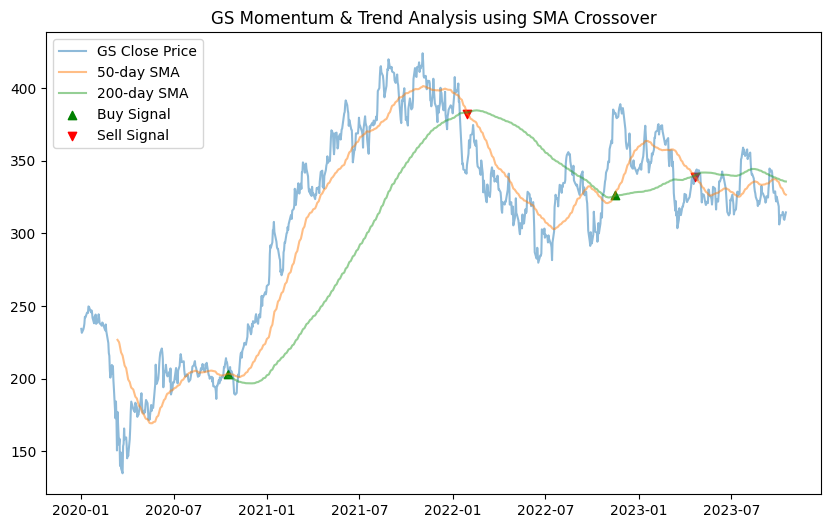

In [ ]:
def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2020-01-01", end="2023-10-17")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

# Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'GS']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

# Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1.0].index,
                signals['short_mavg'][signals['positions'] == 1.0],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1.0].index,
                signals['short_mavg'][signals['positions'] == -1.0],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()